# Exploration of Preprocessed scRNA-seq Data

This notebook explores the preprocessed AnnData objects created by `01_preprocess_raw_data.py`. We examine QC metrics, cell composition, and data quality for the matched tumor/normal patient samples.

In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Display options
pd.set_option('display.max_columns', 50)
plt.style.use('seaborn-v0_8-whitegrid')
sc.settings.verbosity = 1

## 1. Load Preprocessed Data

In [4]:
# Check what processed files exist
processed_dir = Path('../data/processed')
h5ad_files = list(processed_dir.glob('*.h5ad'))

print(f"Processed data directory: {processed_dir}")
print(f"\nAvailable .h5ad files ({len(h5ad_files)}):")
for f in sorted(h5ad_files):
    size_mb = f.stat().st_size / (1024 * 1024)
    print(f"  {f.name} ({size_mb:.1f} MB)")

Processed data directory: ../data/processed

Available .h5ad files (10):
  P0006_preprocessed.h5ad (711.2 MB)
  P0008_preprocessed.h5ad (810.7 MB)
  P0009_preprocessed.h5ad (722.8 MB)
  P0018_preprocessed.h5ad (945.2 MB)
  P0019_preprocessed.h5ad (933.7 MB)
  P0020_preprocessed.h5ad (1113.4 MB)
  P0028_preprocessed.h5ad (920.6 MB)
  P0030_preprocessed.h5ad (905.0 MB)
  P0031_preprocessed.h5ad (1113.4 MB)
  P0034_preprocessed.h5ad (964.3 MB)


In [5]:
# Load P0006 as the proof-of-concept patient
patient_id = 'P0006'
adata = sc.read_h5ad(processed_dir / f'{patient_id}_preprocessed.h5ad')

print(f"Loaded {patient_id}")
print(f"Shape: {adata.shape[0]:,} cells x {adata.shape[1]:,} genes")

Loaded P0006
Shape: 6,265 cells x 29,634 genes


## 2. AnnData Structure Overview

In [4]:
# Overview of the AnnData object
print("AnnData Structure")
print("=" * 60)
print(f"\nX (expression matrix): {adata.X.shape}")
print(f"  dtype: {adata.X.dtype}")
print(f"  sparse: {hasattr(adata.X, 'toarray')}")

print(f"\nobs (cell metadata): {adata.obs.shape}")
print(f"  columns: {list(adata.obs.columns)}")

print(f"\nvar (gene metadata): {adata.var.shape}")
print(f"  columns: {list(adata.var.columns)}")

print(f"\nuns (unstructured): {list(adata.uns.keys())}")

AnnData Structure

X (expression matrix): (6265, 29634)
  dtype: float32
  sparse: False

obs (cell metadata): (6265, 12)
  columns: ['barcode', 'sample_id', 'sample_origin', 'cell_type', 'cell_type_refined', 'cell_subtype', 'patient_id', 'cancer_vs_normal', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt']

var (gene metadata): (29634, 5)
  columns: ['mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts']

uns (unstructured): ['cancer_vs_normal_colors', 'preprocessing', 'sample_id_colors']


In [6]:
# Preprocessing metadata
if 'preprocessing' in adata.uns:
    print("Preprocessing Info")
    print("=" * 60)
    for key, value in adata.uns['preprocessing'].items():
        if key != 'integrity_checks':
            print(f"  {key}: {value}")
    
    if 'integrity_checks' in adata.uns['preprocessing']:
        print("\n  Integrity checks:")
        for k, v in adata.uns['preprocessing']['integrity_checks'].items():
            print(f"    {k}: {v}")

Preprocessing Info
  n_cells_normal: 2839
  n_cells_tumor: 3426
  normal_sample: LUNG_N06
  patient_id: P0006
  tumor_sample: LUNG_T06

  Integrity checks:
    all_integers: True
    n_nonzero: 11051168
    no_negatives: True
    sparsity: 0.9404753529101864
    unique_cells: True
    unique_genes: True


In [7]:
# Preview cell metadata
print("Cell Metadata (obs) - First 10 rows")
adata.obs.head(10)

Cell Metadata (obs) - First 10 rows


,barcode,sample_id,sample_origin,cell_type,cell_type_refined,cell_subtype,patient_id,cancer_vs_normal,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCTGAGATGTGGC_LUNG_N06,AAACCTGAGATGTGGC,LUNG_N06,nLung,Myeloid cells,Myeloid cells,Alveolar Mac,P0006,Normal,3245,20470.0,1557.0,7.606253
AAACCTGAGCGACGTA_LUNG_T06,AAACCTGAGCGACGTA,LUNG_T06,tLung,T lymphocytes,NaN,NaN,P0006,Cancer,864,2859.0,82.0,2.868136
AAACCTGAGGCAAAGA_LUNG_T06,AAACCTGAGGCAAAGA,LUNG_T06,tLung,T lymphocytes,T/NK cells,Exhausted CD8+ T,P0006,Cancer,1113,3323.0,130.0,3.912128
AAACCTGAGTGAAGTT_LUNG_N06,AAACCTGAGTGAAGTT,LUNG_N06,nLung,Epithelial cells,Epithelial cells,Club,P0006,Normal,2322,16626.0,520.0,3.127632
AAACCTGAGTGTTGAA_LUNG_T06,AAACCTGAGTGTTGAA,LUNG_T06,tLung,B lymphocytes,B lymphocytes,Follicular B cells,P0006,Cancer,1019,3958.0,131.0,3.309752
AAACCTGAGTTGCAGG_LUNG_T06,AAACCTGAGTTGCAGG,LUNG_T06,tLung,Myeloid cells,Myeloid cells,mo-Mac,P0006,Cancer,711,1695.0,161.0,9.498526
AAACCTGCAAGAAGAG_LUNG_N06,AAACCTGCAAGAAGAG,LUNG_N06,nLung,Myeloid cells,Myeloid cells,Alveolar Mac,P0006,Normal,3638,22307.0,1675.0,7.508854
AAACCTGCAATCACAC_LUNG_T06,AAACCTGCAATCACAC,LUNG_T06,tLung,T lymphocytes,T/NK cells,CD4+ Th,P0006,Cancer,1060,3301.0,81.0,2.453802
AAACCTGCAATCAGAA_LUNG_T06,AAACCTGCAATCAGAA,LUNG_T06,tLung,T lymphocytes,T/NK cells,CD4+ Th,P0006,Cancer,1277,3805.0,154.0,4.047306
AAACCTGCAATGCCAT_LUNG_N06,AAACCTGCAATGCCAT,LUNG_N06,nLung,Myeloid cells,Myeloid cells,Monocytes,P0006,Normal,1619,5848.0,407.0,6.959644


In [8]:
# Preview gene metadata
print("Gene Metadata (var) - First 10 rows")
adata.var.head(10)

Gene Metadata (var) - First 10 rows


,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
Index,,,,,
A1BG,False,932,0.177813,85.123703,1114.0
A1BG-AS1,False,152,0.025219,97.573823,158.0
A1CF,False,1,0.000160,99.984038,1.0
A2M,False,1382,2.076297,77.940942,13008.0
A2M-AS1,False,162,0.027614,97.414206,173.0
A2ML1,False,0,0.000000,100.000000,0.0
A2ML1-AS1,False,0,0.000000,100.000000,0.0
A2ML1-AS2,False,0,0.000000,100.000000,0.0
A4GALT,False,146,0.028731,97.669593,180.0


In [9]:

print("="*60)
print("MITOCHONDRIAL GENES")
print("="*60)

# Filter to MT genes only
mt_genes = adata.var[adata.var['mt'] == True]

print(f"\nTotal MT genes: {len(mt_genes)}")
print(f"\nMT gene names:")
print(mt_genes.index.tolist())

MITOCHONDRIAL GENES

Total MT genes: 13

MT gene names:
['MT-ATP6', 'MT-ATP8', 'MT-CO1', 'MT-CO2', 'MT-CO3', 'MT-CYB', 'MT-ND1', 'MT-ND2', 'MT-ND3', 'MT-ND4', 'MT-ND4L', 'MT-ND5', 'MT-ND6']


## 3. Sample Composition

In [10]:
# Sample breakdown
print("Sample Composition")
print("=" * 60)

print("\nBy sample_id:")
print(adata.obs['sample_id'].value_counts())

print("\nBy sample_origin:")
print(adata.obs['sample_origin'].value_counts())

print("\nBy cancer_vs_normal:")
print(adata.obs['cancer_vs_normal'].value_counts())

Sample Composition

By sample_id:
sample_id
LUNG_T06    3426
LUNG_N06    2839
Name: count, dtype: int64

By sample_origin:
sample_origin
tLung    3426
nLung    2839
Name: count, dtype: int64

By cancer_vs_normal:
cancer_vs_normal
Cancer    3426
Normal    2839
Name: count, dtype: int64


In [11]:
# Cell type distribution
print("Cell Type Distribution")
print("=" * 60)

print("\nBroad cell types:")
print(adata.obs['cell_type'].value_counts())

print("\nCell subtypes:")
print(adata.obs['cell_subtype'].value_counts())

Cell Type Distribution

Broad cell types:
cell_type
T lymphocytes        2606
Myeloid cells        1898
B lymphocytes         550
Fibroblasts           495
Epithelial cells      323
NK cells              206
MAST cells            124
Endothelial cells      63
Name: count, dtype: int64

Cell subtypes:
cell_subtype
Alveolar Mac             1156
CD4+ Th                   743
Follicular B cells        493
Cytotoxic CD8+ T          434
COL13A1+ matrix FBs       332
mo-Mac                    240
CD163+CD14+ DCs           219
NK                        206
CD8 low T                 148
Naive CD4+ T              147
Treg                      146
MAST                      124
Monocytes                 118
Undetermined              103
Exhausted CD8+ T           93
AT2                        91
CD1c+ DCs                  81
Myofibroblasts             62
tS2                        55
Ciliated                   48
tS1                        40
Tumor ECs                  37
Smooth muscle cells      

In [12]:
# Cross-tabulation: cell types by tumor/normal
crosstab = pd.crosstab(adata.obs['cell_type'], adata.obs['cancer_vs_normal'])
crosstab['Total'] = crosstab.sum(axis=1)
crosstab = crosstab.sort_values('Total', ascending=False)

print("Cell Types by Cancer vs Normal")
crosstab

Cell Types by Cancer vs Normal


cancer_vs_normal,Cancer,Normal,Total
cell_type,,,
T lymphocytes,1499,1107,2606
Myeloid cells,588,1310,1898
B lymphocytes,521,29,550
Fibroblasts,485,10,495
Epithelial cells,145,178,323
NK cells,40,166,206
MAST cells,94,30,124
Endothelial cells,54,9,63


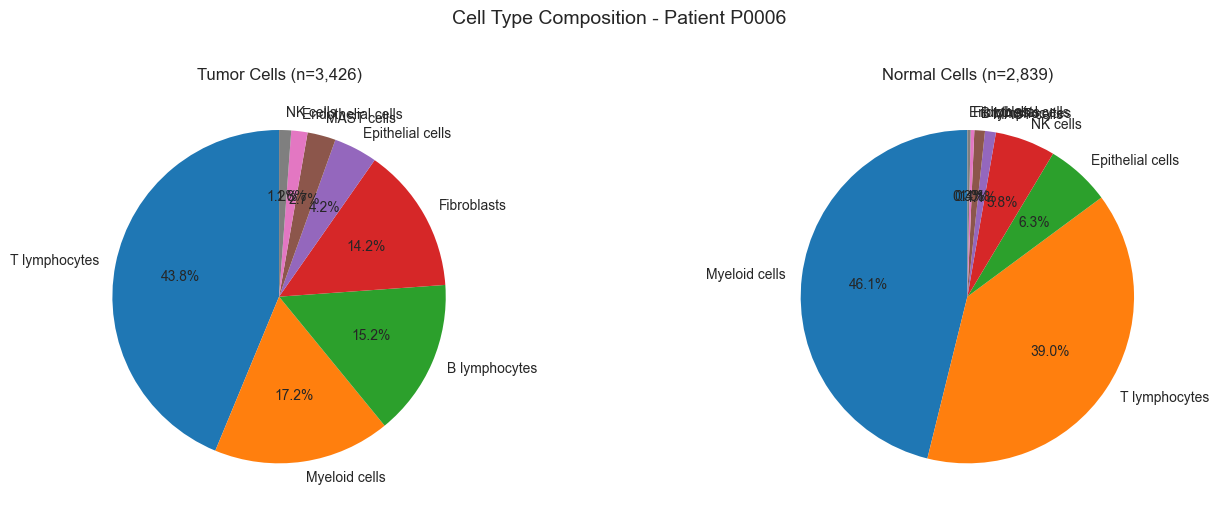

In [13]:
# Visualize cell type composition
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tumor
tumor_cts = adata.obs[adata.obs['cancer_vs_normal'] == 'Cancer']['cell_type'].value_counts()
axes[0].pie(tumor_cts.values, labels=tumor_cts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title(f'Tumor Cells (n={tumor_cts.sum():,})')

# Normal
normal_cts = adata.obs[adata.obs['cancer_vs_normal'] == 'Normal']['cell_type'].value_counts()
axes[1].pie(normal_cts.values, labels=normal_cts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title(f'Normal Cells (n={normal_cts.sum():,})')

plt.suptitle(f'Cell Type Composition - Patient {patient_id}', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 4. QC Metrics Overview

In [14]:
# Summary statistics for QC metrics
qc_cols = ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']

print("QC Metrics Summary")
print("=" * 60)
adata.obs[qc_cols].describe()

QC Metrics Summary


,total_counts,n_genes_by_counts,pct_counts_mt
count,6265.000000,6265.000000,6265.000000
mean,7666.122070,1763.953392,4.562777
std,7710.861328,1063.636739,2.296876
min,1015.000000,212.000000,0.000000
25%,2858.000000,990.000000,3.090932
50%,3973.000000,1234.000000,4.124087
75%,9935.000000,2427.000000,5.542071
max,75209.000000,7874.000000,19.984821


In [15]:
# QC metrics by tumor vs normal
print("QC Metrics by Cancer vs Normal")
print("=" * 60)
adata.obs.groupby('cancer_vs_normal')[qc_cols].describe().T

QC Metrics by Cancer vs Normal


/var/folders/3n/d2dmdqcs54z9j_p6mfpghxhm0000gn/T/ipykernel_20186/449349253.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('cancer_vs_normal')[qc_cols].describe().T


cancer_vs_normal               Cancer        Normal
total_counts      count   3426.000000   2839.000000
                  mean    5740.346191   9990.078125
                  std     4782.297363   9682.623047
                  min     1015.000000   1015.000000
                  25%     2909.250000   2805.500000
                  50%     3837.500000   4455.000000
                  75%     7136.500000  16353.500000
                  max    57223.000000  75209.000000
n_genes_by_counts count   3426.000000   2839.000000
                  mean    1549.992995   2022.152871
                  std      849.132533   1226.755286
                  min      212.000000    329.000000
                  25%      972.000000   1020.000000
                  50%     1194.500000   1357.000000
                  75%     2019.750000   3086.000000
                  max     6754.000000   7874.000000
pct_counts_mt     count   3426.000000   2839.000000
                  mean       4.115109      5.103006
                  std        2.121448      2.383074
                  min        0.000000      0.000000
                  25%        2.866347      3.437723
                  50%        3.717899      4.646840
                  75%        4.887392      6.337236
                  max       19.916143     19.984821

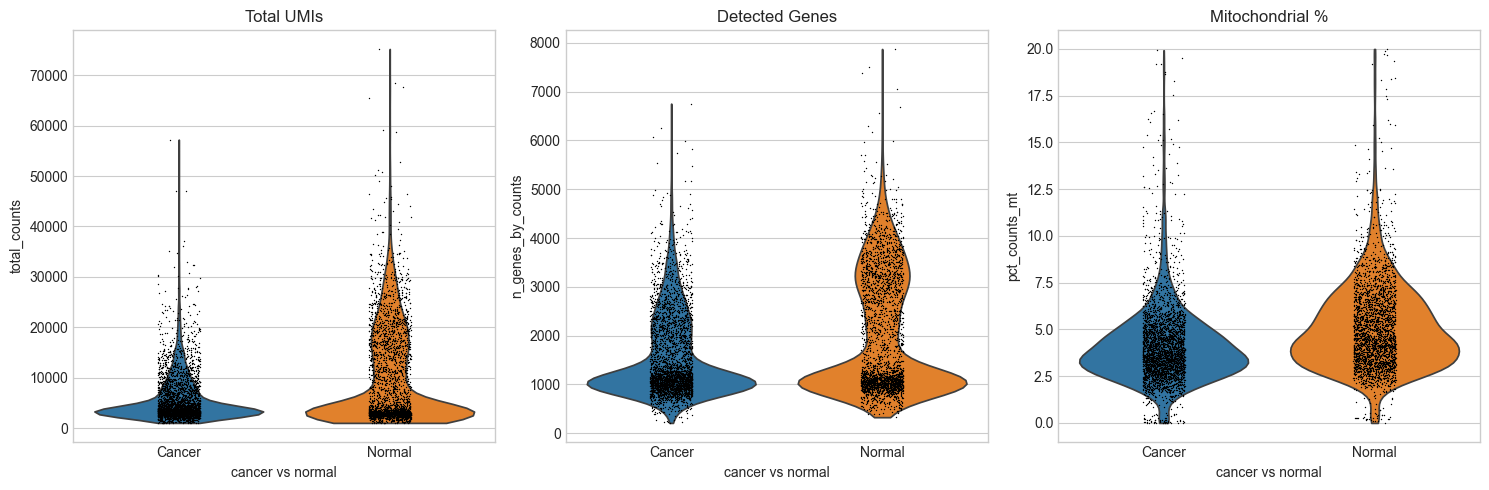

In [16]:
# Violin plots of QC metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, metric, title in zip(axes, qc_cols, ['Total UMIs', 'Detected Genes', 'Mitochondrial %']):
    sc.pl.violin(adata, keys=metric, groupby='cancer_vs_normal', ax=ax, show=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()

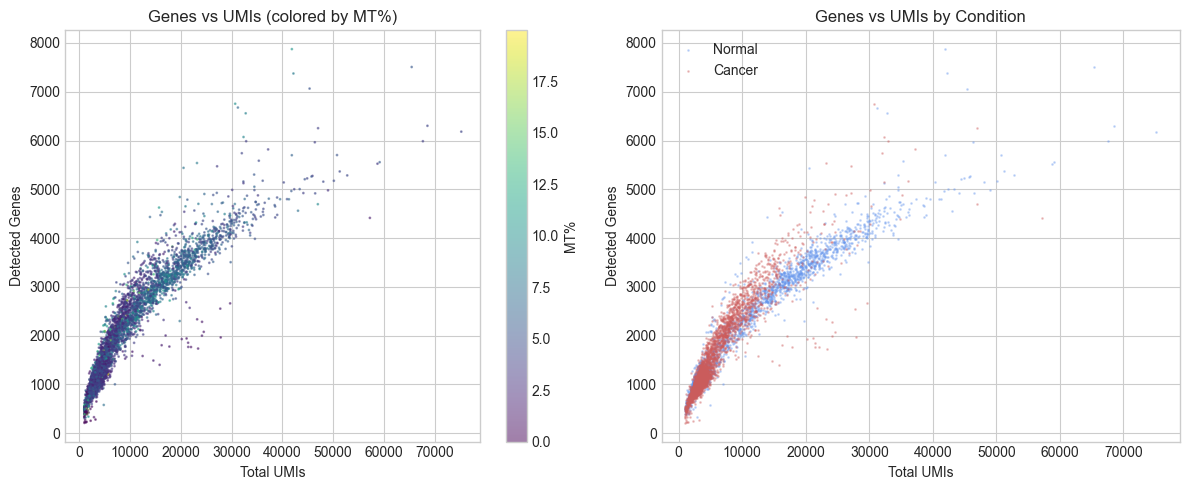

In [17]:
# Scatter plot: genes vs UMIs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Colored by MT%
scatter = axes[0].scatter(
    adata.obs['total_counts'],
    adata.obs['n_genes_by_counts'],
    c=adata.obs['pct_counts_mt'],
    cmap='viridis',
    alpha=0.5,
    s=1
)
axes[0].set_xlabel('Total UMIs')
axes[0].set_ylabel('Detected Genes')
axes[0].set_title('Genes vs UMIs (colored by MT%)')
plt.colorbar(scatter, ax=axes[0], label='MT%')

# Colored by tumor/normal
colors = {'Normal': 'cornflowerblue', 'Cancer': 'indianred'}
for label in ['Normal', 'Cancer']:
    mask = adata.obs['cancer_vs_normal'] == label
    axes[1].scatter(
        adata.obs.loc[mask, 'total_counts'],
        adata.obs.loc[mask, 'n_genes_by_counts'],
        c=colors[label],
        alpha=0.3,
        s=1,
        label=label
    )
axes[1].set_xlabel('Total UMIs')
axes[1].set_ylabel('Detected Genes')
axes[1].set_title('Genes vs UMIs by Condition')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Distribution histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(adata.obs['total_counts'], bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(adata.obs['total_counts'].median(), color='red', linestyle='--', label='Median')
axes[0].set_xlabel('Total UMIs')
axes[0].set_ylabel('Number of Cells')
axes[0].set_title('Distribution of Total UMIs')
axes[0].legend()

axes[1].hist(adata.obs['n_genes_by_counts'], bins=100, color='darkorange', edgecolor='black', alpha=0.7)
axes[1].axvline(adata.obs['n_genes_by_counts'].median(), color='red', linestyle='--', label='Median')
axes[1].set_xlabel('Detected Genes')
axes[1].set_ylabel('Number of Cells')
axes[1].set_title('Distribution of Detected Genes')
axes[1].legend()

axes[2].hist(adata.obs['pct_counts_mt'], bins=100, color='forestgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(adata.obs['pct_counts_mt'].median(), color='red', linestyle='--', label='Median')
axes[2].set_xlabel('Mitochondrial %')
axes[2].set_ylabel('Number of Cells')
axes[2].set_title('Distribution of MT%')
axes[2].legend()

plt.tight_layout()
plt.show()

## 5. Expression Matrix Properties

In [ ]:
# Raw count matrix properties
X = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X

print("Expression Matrix Properties")
print("=" * 60)
print(f"\nShape: {X.shape}")
print(f"dtype: {X.dtype}")
print(f"\nValue range: [{X.min():.0f}, {X.max():.0f}]")
print(f"Mean: {X.mean():.4f}")
print(f"Median: {np.median(X):.4f}")

n_nonzero = np.count_nonzero(X)
sparsity = 1 - (n_nonzero / X.size)
print(f"\nNon-zero entries: {n_nonzero:,} / {X.size:,}")
print(f"Sparsity: {100 * sparsity:.2f}%")

In [ ]:
# Genes per cell distribution
genes_per_cell = np.sum(X > 0, axis=1)
cells_per_gene = np.sum(X > 0, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(genes_per_cell, bins=100, color='purple', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Genes Detected')
axes[0].set_ylabel('Number of Cells')
axes[0].set_title('Genes Detected per Cell')

axes[1].hist(cells_per_gene, bins=100, color='teal', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Cells Expressing')
axes[1].set_ylabel('Number of Genes')
axes[1].set_title('Cells Expressing Each Gene')

plt.tight_layout()
plt.show()

print(f"Genes with zero expression in all cells: {np.sum(cells_per_gene == 0):,}")
print(f"Cells with zero detected genes: {np.sum(genes_per_cell == 0):,}")

## 6. Mitochondrial Gene Analysis

In [ ]:
# Mitochondrial genes
mt_genes = adata.var_names[adata.var['mt']].tolist()
print(f"Mitochondrial genes ({len(mt_genes)}):")
print(mt_genes)

In [ ]:
# MT% by cell type
mt_by_celltype = adata.obs.groupby('cell_type')['pct_counts_mt'].agg(['mean', 'median', 'std'])
mt_by_celltype = mt_by_celltype.sort_values('mean', ascending=False)

print("Mitochondrial % by Cell Type")
mt_by_celltype

In [ ]:
# Violin plot of MT% by cell type
fig, ax = plt.subplots(figsize=(12, 5))
sc.pl.violin(adata, keys='pct_counts_mt', groupby='cell_type', ax=ax, show=False, rotation=45)
ax.set_title('Mitochondrial % by Cell Type')
plt.tight_layout()
plt.show()

## 7. Compare Multiple Patients (if available)

In [ ]:
# Load all available patients and compare
if len(h5ad_files) > 1:
    patient_stats = []
    
    for f in sorted(h5ad_files):
        pid = f.stem.replace('_preprocessed', '')
        ad = sc.read_h5ad(f)
        
        tumor_cells = (ad.obs['cancer_vs_normal'] == 'Cancer').sum()
        normal_cells = (ad.obs['cancer_vs_normal'] == 'Normal').sum()
        
        patient_stats.append({
            'Patient_ID': pid,
            'Total_Cells': ad.n_obs,
            'Total_Genes': ad.n_vars,
            'Tumor_Cells': tumor_cells,
            'Normal_Cells': normal_cells,
            'Median_UMIs': ad.obs['total_counts'].median(),
            'Median_Genes': ad.obs['n_genes_by_counts'].median(),
            'Median_MT%': ad.obs['pct_counts_mt'].median(),
        })
    
    patient_comparison = pd.DataFrame(patient_stats)
    print(f"Comparison of {len(patient_stats)} Patients")
    print("=" * 60)
    display(patient_comparison)
else:
    print("Only one patient file available. Run preprocessing on more patients to compare.")

In [ ]:
# Visualize patient comparison
if len(h5ad_files) > 1:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Cell counts
    x = range(len(patient_comparison))
    width = 0.35
    axes[0, 0].bar([i - width/2 for i in x], patient_comparison['Normal_Cells'], width, label='Normal', color='cornflowerblue')
    axes[0, 0].bar([i + width/2 for i in x], patient_comparison['Tumor_Cells'], width, label='Tumor', color='indianred')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(patient_comparison['Patient_ID'], rotation=45)
    axes[0, 0].set_ylabel('Number of Cells')
    axes[0, 0].set_title('Cell Counts per Patient')
    axes[0, 0].legend()
    
    # Median UMIs
    axes[0, 1].bar(patient_comparison['Patient_ID'], patient_comparison['Median_UMIs'], color='steelblue')
    axes[0, 1].set_ylabel('Median UMIs')
    axes[0, 1].set_title('Median UMIs per Patient')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Median Genes
    axes[1, 0].bar(patient_comparison['Patient_ID'], patient_comparison['Median_Genes'], color='darkorange')
    axes[1, 0].set_ylabel('Median Genes Detected')
    axes[1, 0].set_title('Median Genes per Patient')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Median MT%
    axes[1, 1].bar(patient_comparison['Patient_ID'], patient_comparison['Median_MT%'], color='forestgreen')
    axes[1, 1].set_ylabel('Median MT%')
    axes[1, 1].set_title('Median Mitochondrial % per Patient')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## 8. Data Ready for inferCNV

The preprocessed data contains:
- Raw UMI counts (no normalization applied)
- Cell annotations with `cancer_vs_normal` labels
- QC metrics for reference

Next steps:
1. Run inferCNV to generate CNV profiles
2. Use CNV profiles + expression for multimodal analysis

In [ ]:
# Final summary
print("=" * 60)
print(f"DATA SUMMARY: Patient {patient_id}")
print("=" * 60)
print(f"\nCells: {adata.n_obs:,}")
print(f"  - Tumor: {(adata.obs['cancer_vs_normal'] == 'Cancer').sum():,}")
print(f"  - Normal: {(adata.obs['cancer_vs_normal'] == 'Normal').sum():,}")
print(f"\nGenes: {adata.n_vars:,}")
print(f"  - Mitochondrial: {adata.var['mt'].sum()}")
print(f"\nQC Medians:")
print(f"  - UMIs per cell: {adata.obs['total_counts'].median():,.0f}")
print(f"  - Genes per cell: {adata.obs['n_genes_by_counts'].median():,.0f}")
print(f"  - MT%: {adata.obs['pct_counts_mt'].median():.2f}%")
print(f"\nData is ready for inferCNV!")